In [56]:
import polars as pl

# Cargar datos de ejemplo
df = pl.read_csv('https://raw.githubusercontent.com/pola-rs/polars/main/examples/datasets/foods1.csv')
print(df)

shape: (27, 4)
┌────────────┬──────────┬────────┬──────────┐
│ category   ┆ calories ┆ fats_g ┆ sugars_g │
│ ---        ┆ ---      ┆ ---    ┆ ---      │
│ str        ┆ i64      ┆ f64    ┆ i64      │
╞════════════╪══════════╪════════╪══════════╡
│ vegetables ┆ 45       ┆ 0.5    ┆ 2        │
│ seafood    ┆ 150      ┆ 5.0    ┆ 0        │
│ meat       ┆ 100      ┆ 5.0    ┆ 0        │
│ fruit      ┆ 60       ┆ 0.0    ┆ 11       │
│ …          ┆ …        ┆ …      ┆ …        │
│ fruit      ┆ 130      ┆ 0.0    ┆ 25       │
│ meat       ┆ 100      ┆ 7.0    ┆ 0        │
│ vegetables ┆ 30       ┆ 0.0    ┆ 5        │
│ fruit      ┆ 50       ┆ 0.0    ┆ 11       │
└────────────┴──────────┴────────┴──────────┘


# Selección de datos
En Polars, puedes seleccionar una o varias columnas utilizando la función select(), que toma una o varias cadenas de texto como argumento:

In [57]:
# Seleccionar una columna en Polars
print(df.select(['category']))

# Seleccionar varias columnas en Polars
print(df.select(['category', 'calories']))

shape: (27, 1)
┌────────────┐
│ category   │
│ ---        │
│ str        │
╞════════════╡
│ vegetables │
│ seafood    │
│ meat       │
│ fruit      │
│ …          │
│ fruit      │
│ meat       │
│ vegetables │
│ fruit      │
└────────────┘
shape: (27, 2)
┌────────────┬──────────┐
│ category   ┆ calories │
│ ---        ┆ ---      │
│ str        ┆ i64      │
╞════════════╪══════════╡
│ vegetables ┆ 45       │
│ seafood    ┆ 150      │
│ meat       ┆ 100      │
│ fruit      ┆ 60       │
│ …          ┆ …        │
│ fruit      ┆ 130      │
│ meat       ┆ 100      │
│ vegetables ┆ 30       │
│ fruit      ┆ 50       │
└────────────┴──────────┘


Si quisieras regresar todas las columnas del tipo integer (o específicamente `Int64`):


In [64]:
print(df.select(pl.col(pl.Int64)))

shape: (27, 2)
┌──────────┬──────────┐
│ calories ┆ sugars_g │
│ ---      ┆ ---      │
│ i64      ┆ i64      │
╞══════════╪══════════╡
│ 45       ┆ 2        │
│ 150      ┆ 0        │
│ 100      ┆ 0        │
│ 60       ┆ 11       │
│ …        ┆ …        │
│ 130      ┆ 25       │
│ 100      ┆ 0        │
│ 30       ┆ 5        │
│ 50       ┆ 11       │
└──────────┴──────────┘


In [67]:
print(df.select(pl.col('category','calories').sort_by('calories')))

shape: (27, 2)
┌────────────┬──────────┐
│ category   ┆ calories │
│ ---        ┆ ---      │
│ str        ┆ i64      │
╞════════════╪══════════╡
│ vegetables ┆ 20       │
│ vegetables ┆ 22       │
│ vegetables ┆ 25       │
│ vegetables ┆ 25       │
│ …          ┆ …        │
│ seafood    ┆ 150      │
│ seafood    ┆ 200      │
│ seafood    ┆ 200      │
│ seafood    ┆ 200      │
└────────────┴──────────┘


Si quieres seleccionar filas con base en los valores entonces en Polars se usa el método **.filter**

In [58]:
df.filter(pl.col('calories') > 100)

category,calories,fats_g,sugars_g
str,i64,f64,i64
"""seafood""",150,5.0,0
"""seafood""",140,5.0,1
"""meat""",120,10.0,1
"""seafood""",130,5.0,0
"""meat""",110,7.0,0
"""seafood""",200,10.0,0
"""seafood""",200,7.0,2
"""meat""",110,7.0,0
"""seafood""",200,7.0,2


In [74]:
df.filter((pl.col('calories') > 100) & (pl.col('fats_g') > 5))

category,calories,fats_g,sugars_g
str,i64,f64,i64
"""meat""",120,10.0,1
"""meat""",110,7.0,0
"""seafood""",200,10.0,0
"""seafood""",200,7.0,2
"""meat""",110,7.0,0
"""seafood""",200,7.0,2


`|` - OR
`&` - AND
`~` - NOT


## Seleccionar filas y columnas

In [81]:
df.filter(pl.col('category') == 'vegetables').select('category','calories')

category,calories
str,i64
"""vegetables""",45
"""vegetables""",20
"""vegetables""",25
"""vegetables""",22
"""vegetables""",25
"""vegetables""",25
"""vegetables""",30


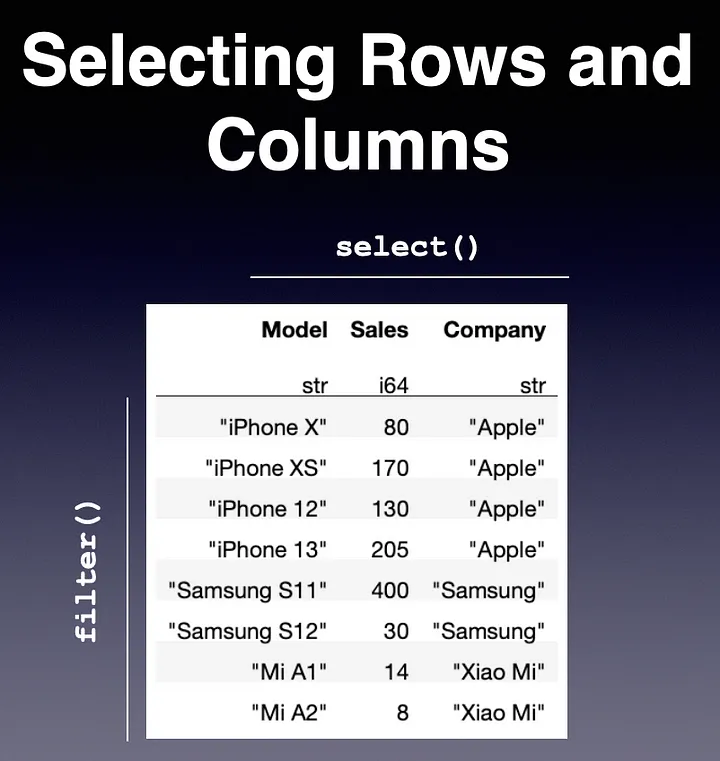

## dtypes

In [82]:
df.dtypes

[Utf8, Int64, Float64, Int64]

## Para obtener el nombre de las columnas y las filas

In [83]:
df.columns

['category', 'calories', 'fats_g', 'sugars_g']

Para obtener el contenido del dataframe como una lista de tuples, usamos el método rows()

In [84]:
df.rows()

[('vegetables', 45, 0.5, 2),
 ('seafood', 150, 5.0, 0),
 ('meat', 100, 5.0, 0),
 ('fruit', 60, 0.0, 11),
 ('seafood', 140, 5.0, 1),
 ('meat', 120, 10.0, 1),
 ('vegetables', 20, 0.0, 2),
 ('fruit', 30, 0.0, 5),
 ('seafood', 130, 5.0, 0),
 ('fruit', 50, 4.5, 0),
 ('meat', 110, 7.0, 0),
 ('vegetables', 25, 0.0, 2),
 ('fruit', 30, 0.0, 3),
 ('vegetables', 22, 0.0, 3),
 ('vegetables', 25, 0.0, 4),
 ('seafood', 100, 5.0, 0),
 ('seafood', 200, 10.0, 0),
 ('seafood', 200, 7.0, 2),
 ('fruit', 60, 0.0, 11),
 ('meat', 110, 7.0, 0),
 ('vegetables', 25, 0.0, 3),
 ('seafood', 200, 7.0, 2),
 ('seafood', 130, 1.5, 0),
 ('fruit', 130, 0.0, 25),
 ('meat', 100, 7.0, 0),
 ('vegetables', 30, 0.0, 5),
 ('fruit', 50, 0.0, 11)]

In [85]:
df.row(3)

('fruit', 60, 0.0, 11)

# Agregar columnas
Si tenemos un dataframe al que le queremos agregar columnas existe una diferencia entre pandas y polars

In [86]:
import pandas as pd

In [107]:
dp = pd.DataFrame({'value':range(5)})
print(dp)

   value
0      0
1      1
2      2
3      3
4      4


In [108]:
dp["tenXValue"] = dp["value"] * 10
dp["hundredXValue"] = dp["value"] * 100
print(dp)

   value  tenXValue  hundredXValue
0      0          0              0
1      1         10            100
2      2         20            200
3      3         30            300
4      4         40            400


En polars esto mismo seria:

In [121]:
df = pl.DataFrame({'value':range(5)})

In [122]:
print(df.with_columns([
    (pl.col("value") * 10).alias("tenXValue"),
    (pl.col("value") * 100).alias("hundredXValue"),
]))

shape: (5, 3)
┌───────┬───────────┬───────────────┐
│ value ┆ tenXValue ┆ hundredXValue │
│ ---   ┆ ---       ┆ ---           │
│ i64   ┆ i64       ┆ i64           │
╞═══════╪═══════════╪═══════════════╡
│ 0     ┆ 0         ┆ 0             │
│ 1     ┆ 10        ┆ 100           │
│ 2     ┆ 20        ┆ 200           │
│ 3     ┆ 30        ┆ 300           │
│ 4     ┆ 40        ┆ 400           │
└───────┴───────────┴───────────────┘


In [123]:
print(df.select([
    pl.all(),
    (pl.col("value") * 10).alias("tenXValue"),
    (pl.col("value") * 100).alias("hundredXValue"),
]))

shape: (5, 3)
┌───────┬───────────┬───────────────┐
│ value ┆ tenXValue ┆ hundredXValue │
│ ---   ┆ ---       ┆ ---           │
│ i64   ┆ i64       ┆ i64           │
╞═══════╪═══════════╪═══════════════╡
│ 0     ┆ 0         ┆ 0             │
│ 1     ┆ 10        ┆ 100           │
│ 2     ┆ 20        ┆ 200           │
│ 3     ┆ 30        ┆ 300           │
│ 4     ┆ 40        ┆ 400           │
└───────┴───────────┴───────────────┘


In [124]:
df = df.select([
    pl.all(),
    (pl.col("value") * 10).alias("tenXValue"),
    (pl.col("value") * 100).alias("hundredXValue"),
])

In [125]:
print(df.select(
    [
        pl.mean('tenXValue').alias("media"),
        pl.median('tenXValue').alias("mediana"),
        pl.sum('tenXValue').alias("suma"),
        pl.min('tenXValue').alias("min"),
        pl.max('tenXValue').alias("max"),
        pl.col('tenXValue').max().alias("otro_max"),
        pl.std('tenXValue').alias("dev std"),
        pl.var('tenXValue').alias("varianza")
    ]))

shape: (1, 8)
┌───────┬─────────┬──────┬─────┬─────┬──────────┬───────────┬──────────┐
│ media ┆ mediana ┆ suma ┆ min ┆ max ┆ otro_max ┆ dev std   ┆ varianza │
│ ---   ┆ ---     ┆ ---  ┆ --- ┆ --- ┆ ---      ┆ ---       ┆ ---      │
│ f64   ┆ f64     ┆ i64  ┆ i64 ┆ i64 ┆ i64      ┆ f64       ┆ f64      │
╞═══════╪═════════╪══════╪═════╪═════╪══════════╪═══════════╪══════════╡
│ 20.0  ┆ 20.0    ┆ 100  ┆ 0   ┆ 40  ┆ 40       ┆ 15.811388 ┆ 250.0    │
└───────┴─────────┴──────┴─────┴─────┴──────────┴───────────┴──────────┘
